# 와인 군집

```
와인의 등급(class)과 각 와인이 가지고 있는 성분들에 대한 데이터를 활용하여, 와인의 특성에 따른 군집을 생성하고, 원래 와인 클래스와 비교해 보고자 한다. 

(참고 : 와인 데이터는 클래스 정보가 있으므로 분류 분석에 많이 쓰이나 여기서는 군집분석으로 활용하였다.)
wine.csv (구분자: comma(“,”), 178 Rows, 18 Columns)
```

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/wine.csv')
df

class  Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  \
0        1    14.23        1.71  2.43               15.6      127.0   
1        1    13.20        1.78  2.14               11.2      100.0   
2        1    13.16        2.36  2.67               18.6      101.0   
3        1    14.37        1.95  2.50               16.8      113.0   
4        1    13.24        2.59  2.87               21.0      118.0   
..     ...      ...         ...   ...                ...        ...   
173      3    13.71        5.65  2.45               20.5       95.0   
174      3    13.40        3.91  2.48               23.0      102.0   
175      3    13.27        4.28  2.26               20.0      120.0   
176      3    13.17        2.59  2.37               20.0      120.0   
177      3    14.13        4.10  2.74               24.5       96.0   

     Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color_intensity   Hue  OD280_OD315_of_diluted_wines  Proline  
0               5.64  1.04                          3.92   1065.0  
1               4.38  1.05                          3.40   1050.0  
2               5.68  1.03                          3.17   1185.0  
3               7.80  0.86                          3.45   1480.0  
4               4.32  1.04                          2.93    735.0  
..               ...   ...                           ...      ...  
173             7.70  0.64                          1.74    740.0  
174             7.30  0.70                          1.56    750.0  
175            10.20  0.59                          1.56    835.0  
176             9.30  0.60                          1.62    840.0  
177             9.20  0.61                          1.60    560.0  

[178 rows x 14 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic_acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_ash             178 non-null    float64
 5   Magnesium                     178 non-null    float64
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280_OD315_of_diluted_wines  178 non-null    float64
 13  Proli

## Q1

```
Class를 제외한 모든 변수에 대해 피어슨 상관계수를 구하고, 
양의 상관이 가장 강한 경우의 상관계수와 음의 상관이 가장 강한 경우의 상관계수를 기술하시오. 

소수점 넷째 자리에서 반올림 하여 셋째 자리까지 기술하시오.
(답안예시) 0.123
```

In [4]:
# Class를 제외
df.# 코드입력

Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280_OD315_of_diluted_wines  Proline  
0                            3.92   1065.0  
1                            3.40   1050.0  
2                            3.17   1185.0  
3                            3.45   1480.0  
4                            2.93    735.0  
..                            ...      ...  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0  

[178 rows x 13 columns]

In [5]:
# Class를 제외한 모든 변수에 대해 피어슨 상관계수
df.# 코드입력

Alcohol  Malic_acid       Ash  \
Alcohol                       1.000000    0.094397  0.211545   
Malic_acid                    0.094397    1.000000  0.164045   
Ash                           0.211545    0.164045  1.000000   
Alcalinity_of_ash            -0.310235    0.288500  0.443367   
Magnesium                     0.270798   -0.054575  0.286587   
Total_phenols                 0.289101   -0.335167  0.128980   
Flavanoids                    0.236815   -0.411007  0.115077   
Nonflavanoid_phenols         -0.155929    0.292977  0.186230   
Proanthocyanins               0.136698   -0.220746  0.009652   
Color_intensity               0.546364    0.248985  0.258887   
Hue                          -0.071747   -0.561296 -0.074667   
OD280_OD315_of_diluted_wines  0.072343   -0.368710  0.003911   
Proline                       0.643720   -0.192011  0.223626   

                              Alcalinity_of_ash  Magnesium  Total_phenols  \
Alcohol                               -0.310235   0.270798       0.289101   
Malic_acid                             0.288500  -0.054575      -0.335167   
Ash                                    0.443367   0.286587       0.128980   
Alcalinity_of_ash                      1.000000  -0.083333      -0.321113   
Magnesium                             -0.083333   1.000000       0.214401   
Total_phenols                         -0.321113   0.214401       1.000000   
Flavanoids                            -0.351370   0.195784       0.864564   
Nonflavanoid_phenols                   0.361922  -0.256294      -0.449935   
Proanthocyanins                       -0.197327   0.236441       0.612413   
Color_intensity                        0.018732   0.199950      -0.055136   
Hue                                   -0.273955   0.055398       0.433681   
OD280_OD315_of_diluted_wines          -0.276769   0.066004       0.699949   
Proline                               -0.440597   0.393351       0.498115   

                              Flavanoids  Nonflavanoid_phenols  \
Alcohol                         0.236815             -0.155929   
Malic_acid                     -0.411007              0.292977   
Ash                             0.115077              0.186230   
Alcalinity_of_ash              -0.351370              0.361922   
Magnesium                       0.195784             -0.256294   
Total_phenols                   0.864564             -0.449935   
Flavanoids                      1.000000             -0.537900   
Nonflavanoid_phenols           -0.537900              1.000000   
Proanthocyanins                 0.652692             -0.365845   
Color_intensity                -0.172379              0.139057   
Hue                             0.543479             -0.262640   
OD280_OD315_of_diluted_wines    0.787194             -0.503270   
Proline                         0.494193             -0.311385   

                              Proanthocyanins  Color_intensity       Hue  \
Alcohol                              0.136698         0.546364 -0.071747   
Malic_acid                          -0.220746         0.248985 -0.561296   
Ash                                  0.009652         0.258887 -0.074667   
Alcalinity_of_ash                   -0.197327         0.018732 -0.273955   
Magnesium                            0.236441         0.199950  0.055398   
Total_phenols                        0.612413        -0.055136  0.433681   
Flavanoids                           0.652692        -0.172379  0.543479   
Nonflavanoid_phenols                -0.365845         0.139057 -0.262640   
Proanthocyanins                      1.000000        -0.025250  0.295544   
Color_intensity                     -0.025250         1.000000 -0.521813   
Hue                                  0.295544        -0.521813  1.000000   
OD280_OD315_of_diluted_wines         0.519067        -0.428815  0.565468   
Proline                              0.330417         0.316100  0.236183   

                              OD280_OD315_of_diluted_wines   Prol

<AxesSubplot:>

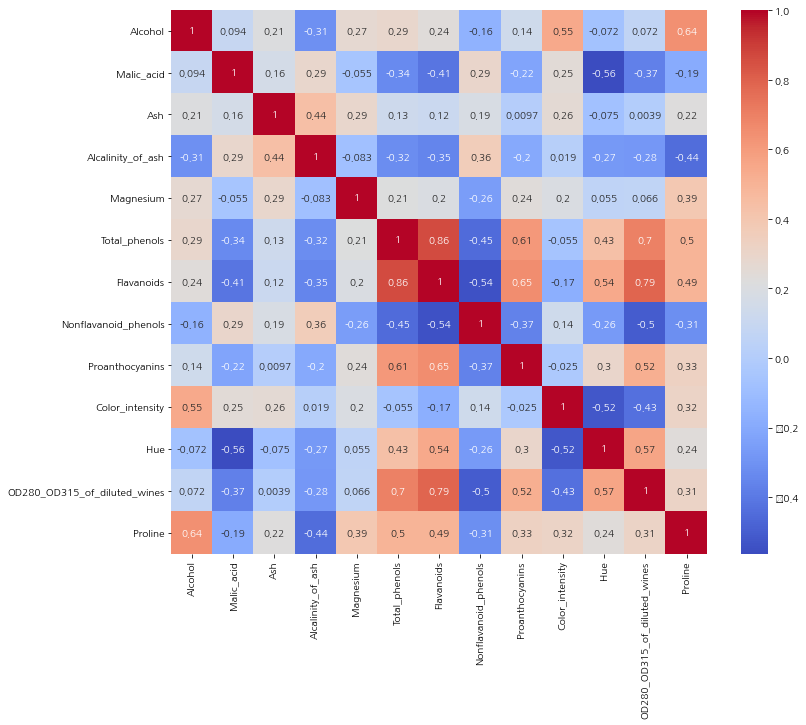

In [6]:
# 피어슨 상관계수 시각화
plt.figure(figsize=(12, 10))
# 코드입력


In [7]:
# 음의 상관이 가장 강한 경우의 상관계수
df.drop('class', 1).corr(method='pearson')

Alcohol  Malic_acid       Ash  \
Alcohol                       1.000000    0.094397  0.211545   
Malic_acid                    0.094397    1.000000  0.164045   
Ash                           0.211545    0.164045  1.000000   
Alcalinity_of_ash            -0.310235    0.288500  0.443367   
Magnesium                     0.270798   -0.054575  0.286587   
Total_phenols                 0.289101   -0.335167  0.128980   
Flavanoids                    0.236815   -0.411007  0.115077   
Nonflavanoid_phenols         -0.155929    0.292977  0.186230   
Proanthocyanins               0.136698   -0.220746  0.009652   
Color_intensity               0.546364    0.248985  0.258887   
Hue                          -0.071747   -0.561296 -0.074667   
OD280_OD315_of_diluted_wines  0.072343   -0.368710  0.003911   
Proline                       0.643720   -0.192011  0.223626   

                              Alcalinity_of_ash  Magnesium  Total_phenols  \
Alcohol                               -0.310235   0.270798       0.289101   
Malic_acid                             0.288500  -0.054575      -0.335167   
Ash                                    0.443367   0.286587       0.128980   
Alcalinity_of_ash                      1.000000  -0.083333      -0.321113   
Magnesium                             -0.083333   1.000000       0.214401   
Total_phenols                         -0.321113   0.214401       1.000000   
Flavanoids                            -0.351370   0.195784       0.864564   
Nonflavanoid_phenols                   0.361922  -0.256294      -0.449935   
Proanthocyanins                       -0.197327   0.236441       0.612413   
Color_intensity                        0.018732   0.199950      -0.055136   
Hue                                   -0.273955   0.055398       0.433681   
OD280_OD315_of_diluted_wines          -0.276769   0.066004       0.699949   
Proline                               -0.440597   0.393351       0.498115   

                              Flavanoids  Nonflavanoid_phenols  \
Alcohol                         0.236815             -0.155929   
Malic_acid                     -0.411007              0.292977   
Ash                             0.115077              0.186230   
Alcalinity_of_ash              -0.351370              0.361922   
Magnesium                       0.195784             -0.256294   
Total_phenols                   0.864564             -0.449935   
Flavanoids                      1.000000             -0.537900   
Nonflavanoid_phenols           -0.537900              1.000000   
Proanthocyanins                 0.652692             -0.365845   
Color_intensity                -0.172379              0.139057   
Hue                             0.543479             -0.262640   
OD280_OD315_of_diluted_wines    0.787194             -0.503270   
Proline                         0.494193             -0.311385   

                              Proanthocyanins  Color_intensity       Hue  \
Alcohol                              0.136698         0.546364 -0.071747   
Malic_acid                          -0.220746         0.248985 -0.561296   
Ash                                  0.009652         0.258887 -0.074667   
Alcalinity_of_ash                   -0.197327         0.018732 -0.273955   
Magnesium                            0.236441         0.199950  0.055398   
Total_phenols                        0.612413        -0.055136  0.433681   
Flavanoids                           0.652692        -0.172379  0.543479   
Nonflavanoid_phenols                -0.365845         0.139057 -0.262640   
Proanthocyanins                      1.000000        -0.025250  0.295544   
Color_intensity                     -0.025250         1.000000 -0.521813   
Hue                                  0.295544        -0.521813  1.000000   
OD280_OD315_of_diluted_wines         0.519067        -0.428815  0.565468   
Proline                              0.330417         0.316100  0.236183   

                              OD280_OD315_of_diluted_wines   Prol

In [8]:
# unstack 으로 피벗테이블 펼침
df.drop('class', 1).corr(method='pearson').unstack()

Alcohol  Alcohol                         1.000000
         Malic_acid                      0.094397
         Ash                             0.211545
         Alcalinity_of_ash              -0.310235
         Magnesium                       0.270798
                                           ...   
Proline  Proanthocyanins                 0.330417
         Color_intensity                 0.316100
         Hue                             0.236183
         OD280_OD315_of_diluted_wines    0.312761
         Proline                         1.000000
Length: 169, dtype: float64

In [9]:
# 음의 상관이 가장 강한 경우의 상관계수
df.# 코드입력

Malic_acid                    Hue                            -0.561296
Hue                           Malic_acid                     -0.561296
Nonflavanoid_phenols          Flavanoids                     -0.537900
Flavanoids                    Nonflavanoid_phenols           -0.537900
Hue                           Color_intensity                -0.521813
Color_intensity               Hue                            -0.521813
OD280_OD315_of_diluted_wines  Nonflavanoid_phenols           -0.503270
Nonflavanoid_phenols          OD280_OD315_of_diluted_wines   -0.503270
Total_phenols                 Nonflavanoid_phenols           -0.449935
Nonflavanoid_phenols          Total_phenols                  -0.449935
Proline                       Alcalinity_of_ash              -0.440597
Alcalinity_of_ash             Proline                        -0.440597
Color_intensity               OD280_OD315_of_diluted_wines   -0.428815
OD280_OD315_of_diluted_wines  Color_intensity                -0.428815
Flavan

In [10]:
# 양의 상관이 가장 강한 경우의 상관계수
df.# 코드입력

Proline                       Proline                         1.000000
OD280_OD315_of_diluted_wines  OD280_OD315_of_diluted_wines    1.000000
Malic_acid                    Malic_acid                      1.000000
Ash                           Ash                             1.000000
Alcalinity_of_ash             Alcalinity_of_ash               1.000000
Magnesium                     Magnesium                       1.000000
Total_phenols                 Total_phenols                   1.000000
Nonflavanoid_phenols          Nonflavanoid_phenols            1.000000
Proanthocyanins               Proanthocyanins                 1.000000
Color_intensity               Color_intensity                 1.000000
Hue                           Hue                             1.000000
Flavanoids                    Flavanoids                      1.000000
Alcohol                       Alcohol                         1.000000
Total_phenols                 Flavanoids                      0.864564
Flavan

## Q 2-1

```
앞서 살펴본 것처럼, 각 변수가 상관성이 매우 높은 것으로 나타났다. 

따라서, PCA를 통해 몇 개의 독립된 변수를 추출하고자 한다. Class를 제외한 모든 변수에 대해, Z 스케일링을 하고, 스케일링 된 변수로 PCA를 수행한 후 다음 질문에 답하시오

- PCA에서 SVD Solver는 Full, Seed=123, 문제에서 주어지지 않은 파라미터 세팅은 디폴트 세팅
```

```
(1) 전체 분산의 80% 이상을 설명하기 위해 최소한 몇 개의 주성분을 취해야 하는지 기술하시오
```

In [11]:
df.head()

class  Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6      127.0   
1      1    13.20        1.78  2.14               11.2      100.0   
2      1    13.16        2.36  2.67               18.6      101.0   
3      1    14.37        1.95  2.50               16.8      113.0   
4      1    13.24        2.59  2.87               21.0      118.0   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue  OD280_OD315_of_diluted_wines  Proline  
0             5.64  1.04                          3.92   1065.0  
1             4.38  1.05                          3.40   1050.0  
2             5.68  1.03                          3.17   1185.0  
3             7.80  0.86                          3.45   1480.0  
4             4.32  1.04                          2.93    735.0

In [12]:
X = df.drop('class', axis=1)
X.head()

Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280_OD315_of_diluted_wines  Proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

In [13]:
# Z-scale
from sklearn.preprocessing import StandardScaler

In [14]:
std_scaler = # 코드입력

In [15]:
X_scaled = std_scaler.# 코드입력
X_scaled[:2]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152]])

In [16]:
# 주성분 분석
from sklearn.decomposition import PCA

**SVD Solver란**

[특이값 분해(Singular Value Decomposition, SVD)](https://darkpgmr.tistory.com/106)

특이값 분해(SVD)는 고유값 분해(eigendecomposition)처럼 행렬을 대각화하는 한 방법

In [17]:
# PCA에서 SVD Solver는 Full, Seed=123, 문제에서 주어지지 않은 파라미터 세팅은 디폴트 세팅
pca = PCA(svd_solver='full', random_state=123)

In [18]:
pca.fit(X_scaled)

PCA(random_state=123, svd_solver='full')

In [19]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

80% 이상의 설명력

**정답: 5**

### Q 2-2

```
위의 결과의 의미는 원 데이터셋 분산의 36.19%가 첫 번째 주성분 축에 놓여 있고, 19.20%가 두 번째 주성분 축에 놓여 있다는 것을 말한다. 그리고 세 번째 주성분 축에는 11.1% 놓여 있다는 것을 알 수 있다. 

따라서, 첫 번째, 두 번째, 그리고 세 번째 주성분을 이용해 투영할 경우, 원래 데이터셋의 분산에서 
36.19% + 19.20% + 11.12% = 66.51% 의 explained variance 를 가진다
```

In [20]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [21]:
# 전체 분산의 80% 이상을 설명하기 위해 최소한 몇 개의 주성분을 취해야 하는지 기술
# (답안예시) 1
cum_variance = 0
cnt = 1
for i in pca.explained_variance_ratio_:
    cum_variance += i
    print(f'n={cnt}, variance: {cum_variance*100:.2f} %')
    cnt+=1

n=1, variance: 36.20 %
n=2, variance: 55.41 %
n=3, variance: 66.53 %
n=4, variance: 73.60 %
n=5, variance: 80.16 %
n=6, variance: 85.10 %
n=7, variance: 89.34 %
n=8, variance: 92.02 %
n=9, variance: 94.24 %
n=10, variance: 96.17 %
n=11, variance: 97.91 %
n=12, variance: 99.20 %
n=13, variance: 100.00 %


N=일때, 80.16%가 나오므로 N=5 다

In [22]:
# wind dataframe의 column 출력
columns = df.drop('class', 1).columns
columns

Index(['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       'OD280_OD315_of_diluted_wines', 'Proline'],
      dtype='object')

In [23]:
# 주성분 별 영향도 max 값 산출
# 코드입력


0     0.422934
1     0.529996
2     0.626224
3     0.536890
4     0.727049
5     0.536814
6     0.595447
7     0.436624
8     0.575786
9     0.523706
10    0.539270
11    0.604222
12    0.832257
dtype: float64

In [24]:
# 주성분 별 영향도 max 값에 대한 feature 산출
# 코드입력


array([ 6,  9,  2,  1,  4,  1,  7, 10, 12, 11, 12,  9,  6])

In [25]:
# 첫 번째 주성분과 두 번째 주성분에 영향을 가장 많이 주는 변수 확인 ('Flavanoids', 'Color_intensity')
# Malic_acid 은 몇 번째 주성분(주성분은 제1~13번째 주성분이 있다)에 가장 큰 영향을 주는지 확인 (4)
columns[abs(pca.components_).argmax(axis=1)]

Index(['Flavanoids', 'Color_intensity', 'Ash', 'Malic_acid', 'Magnesium',
       'Malic_acid', 'Nonflavanoid_phenols', 'Hue', 'Proline',
       'OD280_OD315_of_diluted_wines', 'Proline', 'Color_intensity',
       'Flavanoids'],
      dtype='object')

정답: Flavanoids, Color_intensity, 4

## Q 2-3

```
와인등급이 3인 경우, 제 2주성분으로 프로젝션 된 값의 평균은 얼마이며, 와인등급이 1인 경우, 제 1주성분으로 프로젝션 된 값의 최소값은 얼마인가? 

소수점 셋째 자리 아래는 버리고, 소수점 셋째 자리까지 기술하시오.
(답안예시) 0.123, 0.123
```

In [26]:
# PCA 변환
X_pca = pca.# 코드입력
X_pca

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [27]:
df_pca = pd.DataFrame(X_pca)
df_pca['class'] = df['class']
df_pca

0         1         2         3         4         5         6  \
0    3.316751 -1.443463 -0.165739 -0.215631  0.693043 -0.223880  0.596427   
1    2.209465  0.333393 -2.026457 -0.291358 -0.257655 -0.927120  0.053776   
2    2.516740 -1.031151  0.982819  0.724902 -0.251033  0.549276  0.424205   
3    3.757066 -2.756372 -0.176192  0.567983 -0.311842  0.114431 -0.383337   
4    1.008908 -0.869831  2.026688 -0.409766  0.298458 -0.406520  0.444074   
..        ...       ...       ...       ...       ...       ...       ...   
173 -3.370524 -2.216289 -0.342570  1.058527 -0.574164 -1.108788  0.958416   
174 -2.601956 -1.757229  0.207581  0.349496  0.255063 -0.026465  0.146894   
175 -2.677839 -2.760899 -0.940942  0.312035  1.271355  0.273068  0.679235   
176 -2.387017 -2.297347 -0.550696 -0.688285  0.813955  1.178783  0.633975   
177 -3.208758 -2.768920  1.013914  0.596903 -0.895193  0.296092  0.005741   

            7         8         9        10        11        12  class  
0    0.065139  0.641443  1.020956 -0.451563  0.540810 -0.066239      1  
1    1.024416 -0.308847  0.159701 -0.142657  0.388238  0.003637      1  
2   -0.344216 -1.177834  0.113361 -0.286673  0.000584  0.021717      1  
3    0.643593  0.052544  0.239413  0.759584 -0.242020 -0.369484      1  
4    0.416700  0.326819 -0.078366 -0.525945 -0.216664 -0.079364      1  
..        ...       ...       ...       ...       ...       ...    ...  
173 -0.146097 -0.022498 -0.304117  0.139228  0.170786 -0.114427      3  
174 -0.552427 -0.097969 -0.206061  0.258198 -0.279431 -0.187371      3  
175  0.047024  0.001222 -0.247997  0.512492  0.698766  0.072078      3  
176  0.390829  0.057448  0.491490  0.299822  0.339821 -0.021866      3  
177 -0.292914  0.741660 -0.117969 -0.229964 -0.188788 -0.323965      3  

[178 rows x 14 columns]

In [28]:
# 와인등급이 3인 경우, 제 2주성분으로 프로젝션 된 값의 평균
df_pca.loc[df_pca['class'] == 3, 1].mean()

-1.241307975138978

In [29]:
# 와인등급이 1인 경우, 제 1주성분으로 프로젝션 된 값의 최소값
df_pca.loc[df_pca['class'] == 1, 0].min()

0.4622091375160064

**정답: -1.241, 0.462**

## Q 2-4

```
PCA를 통해 얻어진 제 1,2 주성분으로 프로젝션 된 값에 대해 각 와인등급(Class)이 어떻게 분포되어 있는지 확인하기 위해 산점도(X축이 제 1주성분, Y축이 제 2 주성분)를 그리시오.
```

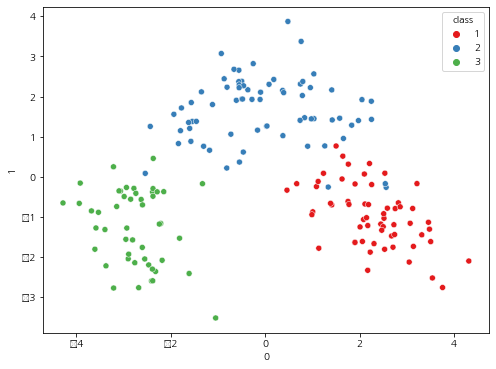

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(0, 1, hue='class', data=df_pca, palette='Set1')
plt.show()

## Q 3~6

```
와인등급(Class)을 제외한 나머지 변수의 특징을 활용하여 군집분석을 수행하려고 한다. 

먼저, 데이터셋을 Training set과 Test set을 나누어 다음 분석을 수행한다. 
데이터 셋의 첫 두 행은 Training set, 세 번째 행은 Test set, 네 번 째, 다섯 번 째 행은 Training set, 여섯 번째 행은 Test set과 같이 행 번호가 3의 배수이면 Test set으로, 그렇지 않은 경우는 Training set으로 하시오.

Training Set으로 군집 모형을 만들고 Test Set에 적용하여, 예측한 군집이 실제 와인등급과 진짜 비슷하게 나오는지 확인해보자. 

군집화를 수행하기에 앞서 Alcohol~Proline에 대해 Z Scaling(Normalization) 한다. 
Training Set 에 대해 먼저 Scaling을 하고 그 결과를 Test Set 에 적용한 후 다음 분석을 수행하시오.
```

In [31]:
df.head()

class  Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6      127.0   
1      1    13.20        1.78  2.14               11.2      100.0   
2      1    13.16        2.36  2.67               18.6      101.0   
3      1    14.37        1.95  2.50               16.8      113.0   
4      1    13.24        2.59  2.87               21.0      118.0   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue  OD280_OD315_of_diluted_wines  Proline  
0             5.64  1.04                          3.92   1065.0  
1             4.38  1.05                          3.40   1050.0  
2             5.68  1.03                          3.17   1185.0  
3             7.80  0.86                          3.45   1480.0  
4             4.32  1.04                          2.93    735.0

In [32]:
# Test set과 같이 행 번호가 3의 배수이면 Test set
df.# 코드입력

class  Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  \
0       1    14.23        1.71  2.43               15.6      127.0   
3       1    14.37        1.95  2.50               16.8      113.0   
6       1    14.39        1.87  2.45               14.6       96.0   
9       1    13.86        1.35  2.27               16.0       98.0   
12      1    13.75        1.73  2.41               16.0       89.0   
15      1    13.63        1.81  2.70               17.2      112.0   
18      1    14.19        1.59  2.48               16.5      108.0   
21      1    12.93        3.80  2.65               18.6      102.0   
24      1    13.50        1.81  2.61               20.0       96.0   
27      1    13.30        1.72  2.14               17.0       94.0   

    Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0            2.80        3.06                  0.28             2.29   
3            3.85        3.49                  0.24             2.18   
6            2.50        2.52                  0.30             1.98   
9            2.98        3.15                  0.22             1.85   
12           2.60        2.76                  0.29             1.81   
15           2.85        2.91                  0.30             1.46   
18           3.30        3.93                  0.32             1.86   
21           2.41        2.41                  0.25             1.98   
24           2.53        2.61                  0.28             1.66   
27           2.40        2.19                  0.27             1.35   

    Color_intensity   Hue  OD280_OD315_of_diluted_wines  Proline  
0              5.64  1.04                          3.92   1065.0  
3              7.80  0.86                          3.45   1480.0  
6              5.25  1.02                          3.58   1290.0  
9              7.22  1.01                          3.55   1045.0  
12             5.60  1.15                          2.90   1320.0  
15             7.30  1.28                          2.88   1310.0  
18             8.70  1.23                          2.82   1680.0  
21             4.50  1.03                          3.52    770.0  
24             3.52  1.12                          3.82    845.0  
27             3.95  1.02                          2.77   1285.0

In [33]:
# 데이터 셋의 첫 두 행은 Training set
df.# 코드입력

class  Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  \
1       1    13.20        1.78  2.14               11.2      100.0   
2       1    13.16        2.36  2.67               18.6      101.0   
4       1    13.24        2.59  2.87               21.0      118.0   
5       1    14.20        1.76  2.45               15.2      112.0   
7       1    14.06        2.15  2.61               17.6      121.0   
8       1    14.83        1.64  2.17               14.0       97.0   
10      1    14.10        2.16  2.30               18.0      105.0   
11      1    14.12        1.48  2.32               16.8       95.0   
13      1    14.75        1.73  2.39               11.4       91.0   
14      1    14.38        1.87  2.38               12.0      102.0   

    Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
1            2.65        2.76                  0.26             1.28   
2            2.80        3.24                  0.30             2.81   
4            2.80        2.69                  0.39             1.82   
5            3.27        3.39                  0.34             1.97   
7            2.60        2.51                  0.31             1.25   
8            2.80        2.98                  0.29             1.98   
10           2.95        3.32                  0.22             2.38   
11           2.20        2.43                  0.26             1.57   
13           3.10        3.69                  0.43             2.81   
14           3.30        3.64                  0.29             2.96   

    Color_intensity   Hue  OD280_OD315_of_diluted_wines  Proline  
1              4.38  1.05                          3.40   1050.0  
2              5.68  1.03                          3.17   1185.0  
4              4.32  1.04                          2.93    735.0  
5              6.75  1.05                          2.85   1450.0  
7              5.05  1.06                          3.58   1295.0  
8              5.20  1.08                          2.85   1045.0  
10             5.75  1.25                          3.17   1510.0  
11             5.00  1.17                          2.82   1280.0  
13             5.40  1.25                          2.73   1150.0  
14             7.50  1.20                          3.00   1547.0

In [34]:
# train / test split
train = df.iloc[~(df.index%3==0)]
test = df.iloc[df.index%3==0]

In [35]:
scaler = StandardScaler()
# z-scale train
train_scaled = scaler.# 코드입력
# z-scale test
test_scaled = scaler.# 코드입력

## Q 3

```
Training Set 의 Z Scaling한 변수들에 대해 K-means 군집화를 수행하기 위해, 최적의 K를 찾고자 한다. 

Silhouette metric 기반으로 가장 적절한 K를 2~5사이에서 선정한다. 
Training Set 에 대해 K-means 군집모형을 만들고, 이 모형을 Test Set에 적용하였을 때, 사이즈가 가장 큰 군집은 몇 건의 데이터가 속하는가? 
K-means 군집화를 위한 적절한 K와 사이즈가 가장 큰 군집에 속하는 데이터 건수를 순서대로 기술하시오.

- K-means silhouette, K-means 의 seed= 123, 문제에서 주어지지 않은 파라미터 세팅은 디폴트 세팅
(답안예시) 2, 10
```

[KMeans Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

[Silhouette metric](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [37]:
# K-means 군집화를 위한 적절한 K와 사이즈 확인
for K in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=K, random_state=123)
    kmeans.fit(train_scaled)
    test_cluster = kmeans.predict(test_scaled)
    display(pd.Series(test_cluster).value_counts())
    print(silhouette_score(test_scaled, test_cluster))

1    31
0    29
dtype: int64

0.251279474185967


2    22
1    22
0    16
dtype: int64

0.2961831743866795


0    19
3    16
1    14
2    11
dtype: int64

0.24651725781833403


4    20
2    14
3    10
1     8
0     8
dtype: int64

0.17199024091177398


**정답: 3, 22**

## Q 4

```
3번의 K means의 결과의 군집결과가 어떤 변수에 의한 영향도가 가장 큰지 비교하고자 한다. 

3번에서 k=3 인 K-means 에 의한 군집을 y변수, 
Z Scaling 한 Alcohol~Proline 변수를 X변수로 하여, 
XGB Classification을 수행하였을 때, 영향력이 가장 큰 변수 두 개를 영향력이 큰 순서대로 기술하시오. 

- 변수명은 Z Scaling된 변수명이 아닌 원 데이터의 변수명으로 기입할 것
- XGB Classification의 seed= 123, 문제에서 주어지지 않은 파라미터 세팅은 디폴트 세팅

(답안예시) Alcohol, Proline
```

In [38]:
# Z Scaling 한 Alcohol~Proline 변수를 X변수
# k=3 인 K-means 에 의한 군집을 y변수
kmeans = KMeans(n_clusters=3, random_state=123)
kmeans.fit(train_scaled)
test_y = kmeans.predict(test_scaled)

In [40]:
# XGBOOST Classification
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=123)
xgb.fit(test_scaled, test_y)

[05:38:01] WARNING: /home/tmp/xgboost/src/learner.cc:570: 
Parameters: { scale_pos_weight, silent, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:38:01] WARNING: /home/tmp/xgboost/src/learner.cc:1092: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', class_weight=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, eval_metric=None, eval_set=None,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None,
              monotone_constraints='()', n_estimators=100, n_jobs=1, nthread=1,
              num_parallel_tree=1, objective='multi:softprob', random_state=123,
              reg_alpha=0, reg_lambda=1, sample_weight_eval_set=None,
              scale_pos_weight=1, seed=123, ...)

In [41]:
# feature importances
# 코드입력


0         1
11  OD280_OD315_of_diluted_wines  0.360926
9                Color_intensity  0.168838
12                       Proline  0.149276
5                  Total_phenols  0.108970
6                     Flavanoids  0.087165
10                           Hue  0.028413
4                      Magnesium  0.027432
1                     Malic_acid  0.019180
8                Proanthocyanins  0.018652
3              Alcalinity_of_ash  0.012426
0                        Alcohol  0.012201
7           Nonflavanoid_phenols  0.006521
2                            Ash  0.000000

## Q 5

```
Training Set 의 Z Scaling한 변수들에 대해 Hierarchical Clustering(Metric을 Euclidean으로, Ward Linkage)을 수행하고 군집수를 5개로 할 때 와인 병의 수(entity 수)가 가장 적은 경우와 가장 많은 경우 몇 병의 와인으로 구성되어 있는지 차례대로 기술하시오. 
(답안예시) 1, 30
```

[Agglomerative Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hc = AgglomerativeClustering(n_clusters=5, linkage='ward', affinity='euclidean')
hc.fit(train_scaled)

In [ ]:
# 와인 병의 수(entity 수)가 가장 적은 경우와 가장 많은 경우 몇 병의 와인으로 구성
pd.Series(hc.labels_).value_counts()

## Q 6

```
주어진 데이터가 3 개의 정규분포(Gaussian)에서 생성되었다고 가정하고, 
정규분포의 모수인 평균과 분산을 EM(Expectation Maximization)알고리즘을 통해 추정하여 군집화를 수행하고자 한다. 

Training Set 의 Z Scaling한 변수들에 대해 군집화를 수행하고, Test Set에 군집모형을 적용한다. 
군집화 결과와 실제 와인등급(Class)을 비교하였을 때, 동일 와인등급 내 가장 많이 속한 군집을 실제 와인등급으로 판단할 것이다. 

이 군집 모형에 의해, 실제 와인등급을 잘못 찾는 건(와인 병)이 몇 건인지 기술하시오. 
- seed=123, 문제에서 주어지지 않은 파라미터 세팅은 디폴트 세팅
```

[Gaussian Mixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
# 주어진 데이터가 3 개의 정규분포(Gaussian)에서 생성되었다고 가정
gm = GaussianMixture(n_components=3, random_state=123)
gm.fit(train_scaled)

In [ ]:
test_prediction = gm.predict(test_scaled)
test_prediction

In [ ]:
test['class']

In [ ]:
label_map = {
    1: 0,
    2: 2, 
    3: 1,
}

In [ ]:
test['class'].map(label_map)

In [ ]:
# 실제 와인등급을 잘못 찾는 건(와인 병)이 몇 건인지 기술
(test['class'].map(label_map) != test_prediction).sum()

**정답: 4**